## Data analysis on ***"Big-Five Factor Markers"*** 
### 1.Load the processed dataset

In [0]:
file_location = "/FileStore/tables/data_processed.csv"

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
from matplotlib import pyplot as plt
# import matplotlib as plt
import pandas as pd
import numpy as np
import seaborn as sns
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorSlicer
from mpl_toolkits.mplot3d import Axes3D


In [0]:
spark = SparkSession.builder.appName('ml-bank').getOrCreate()
df = spark.read.csv(file_location, header = True)
df.printSchema()

root
-- EXT1: string (nullable = true)
-- EXT2: string (nullable = true)
-- EXT3: string (nullable = true)
-- EXT4: string (nullable = true)
-- EXT5: string (nullable = true)
-- EXT6: string (nullable = true)
-- EXT7: string (nullable = true)
-- EXT8: string (nullable = true)
-- EXT9: string (nullable = true)
-- EXT10: string (nullable = true)
-- EST1: string (nullable = true)
-- EST2: string (nullable = true)
-- EST3: string (nullable = true)
-- EST4: string (nullable = true)
-- EST5: string (nullable = true)
-- EST6: string (nullable = true)
-- EST7: string (nullable = true)
-- EST8: string (nullable = true)
-- EST9: string (nullable = true)
-- EST10: string (nullable = true)
-- AGR1: string (nullable = true)
-- AGR2: string (nullable = true)
-- AGR3: string (nullable = true)
-- AGR4: string (nullable = true)
-- AGR5: string (nullable = true)
-- AGR6: string (nullable = true)
-- AGR7: string (nullable = true)
-- AGR8: string (nullable = true)
-- AGR9: string (nullable = true)
-- AGR10: string (nullable = true)
-- CSN1: string (nullable = true)
-- CSN2: string (nullable = true)
-- CSN3: string (nullable = true)
-- CSN4: string (nullable = true)
-- CSN5: string (nullable = true)
-- CSN6: string (nullable = true)
-- CSN7: string (nullable = true)
-- CSN8: string (nullable = true)
-- CSN9: string (nullable = true)
-- CSN10: string (nullable = true)
-- OPN1: string (nullable = true)
-- OPN2: string (nullable = true)
-- OPN3: string (nullable = true)
-- OPN4: string (nullable = true)
-- OPN5: string (nullable = true)
-- OPN6: string (nullable = true)
-- OPN7: string (nullable = true)
-- OPN8: string (nullable = true)
-- OPN9: string (nullable = true)
-- OPN10: string (nullable = true)
-- country: string (nullable = true)

In [0]:
print((df.count(), len(df.columns)))

(1012050, 51)

### 2.Processing data

In [0]:
features = ["EXT1", "EXT2" ,"EXT3" ,"EXT4" ,"EXT5" ,"EXT6" ,"EXT7" ,"EXT8" ,"EXT9" ,"EXT10",
            "EST1" ,"EST2" ,"EST3" ,"EST4" ,"EST5" ,"EST6" ,"EST7" ,"EST8" ,"EST9" ,"EST10",
            "AGR1" ,"AGR2" ,"AGR3" ,"AGR4" ,"AGR5" ,"AGR6" ,"AGR7" ,"AGR8" ,"AGR9" ,"AGR10",
            "CSN1" ,"CSN2" ,"CSN3" ,"CSN4" ,"CSN5" ,"CSN6" ,"CSN7" ,"CSN8" ,"CSN9" ,"CSN10",
            "OPN1" ,"OPN2" ,"OPN3" ,"OPN4" ,"OPN5" ,"OPN6" ,"OPN7" ,"OPN8" ,"OPN9" ,"OPN10"
           ]


for each_feature in df.columns:
    if each_feature in features:
            df = df.withColumn(each_feature, df[each_feature].cast(FloatType()))

In [0]:
df.show()

+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+-------+
EXT1|EXT2|EXT3|EXT4|EXT5|EXT6|EXT7|EXT8|EXT9|EXT10|EST1|EST2|EST3|EST4|EST5|EST6|EST7|EST8|EST9|EST10|AGR1|AGR2|AGR3|AGR4|AGR5|AGR6|AGR7|AGR8|AGR9|AGR10|CSN1|CSN2|CSN3|CSN4|CSN5|CSN6|CSN7|CSN8|CSN9|CSN10|OPN1|OPN2|OPN3|OPN4|OPN5|OPN6|OPN7|OPN8|OPN9|OPN10|country|
+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+-------+
 4.0| 1.0| 5.0| 2.0| 5.0| 1.0| 5.0| 2.0| 4.0| 1.0| 1.0| 4.0| 4.0| 2.0| 2.0| 2.0| 2.0| 2.0| 3.0| 2.0| 2.0| 5.0| 2.0| 4.0| 2.0| 3.0| 2.0| 4.0| 3.0| 4.0| 3.0| 4.0| 3.0| 2.0| 2.0| 4.0| 4.0| 2.0| 4.0| 4.0| 5.0| 1.0| 4.0| 1.0| 4.0| 1.0| 5.0| 3.0| 4.0| 5.0| GB|
 3.0| 5.0| 3.0| 4.0| 3.0| 3.0| 2.0| 5.0| 1.0| 5.0| 2.0| 3.0| 4.0| 1.0| 3.0| 1.0| 2.0| 1.0| 3.0| 1.0| 1.0| 4.0| 1.0| 5.0| 1.0| 5.0| 3.0| 4.0| 5.0| 3.0| 3.0| 2.0| 5.0| 3.0| 3.0| 1.0| 3.0| 3.0| 5.0| 3.0| 1.0| 2.0| 4.0| 2.0| 3.0| 1.0| 4.0| 2.0| 5.0| 3.0| MY|
 2.0| 3.0| 4.0| 4.0| 3.0| 2.0| 1.0| 3.0| 2.0| 5.0| 4.0| 4.0| 4.0| 2.0| 2.0| 2.0| 2.0| 2.0| 1.0| 3.0| 1.0| 4.0| 1.0| 4.0| 2.0| 4.0| 1.0| 4.0| 4.0| 3.0| 4.0| 2.0| 2.0| 2.0| 3.0| 3.0| 4.0| 2.0| 4.0| 2.0| 5.0| 1.0| 2.0| 1.0| 4.0| 2.0| 5.0| 3.0| 4.0| 4.0| GB|
 2.0| 2.0| 2.0| 3.0| 4.0| 2.0| 2.0| 4.0| 1.0| 4.0| 3.0| 3.0| 3.0| 2.0| 3.0| 2.0| 2.0| 2.0| 4.0| 3.0| 2.0| 4.0| 3.0| 4.0| 2.0| 4.0| 2.0| 4.0| 3.0| 4.0| 2.0| 4.0| 4.0| 4.0| 1.0| 2.0| 2.0| 3.0| 1.0| 4.0| 4.0| 2.0| 5.0| 2.0| 3.0| 1.0| 4.0| 4.0| 3.0| 3.0| GB|
 3.0| 3.0| 3.0| 3.0| 5.0| 3.0| 3.0| 5.0| 3.0| 4.0| 1.0| 5.0| 5.0| 3.0| 1.0| 1.0| 1.0| 1.0| 3.0| 2.0| 1.0| 5.0| 1.0| 5.0| 1.0| 3.0| 1.0| 5.0| 5.0| 3.0| 5.0| 1.0| 5.0| 1.0| 3.0| 1.0| 5.0| 1.0| 5.0| 5.0| 5.0| 1.0| 5.0| 1.0| 5.0| 1.0| 5.0| 3.0| 5.0| 5.0| KE|
 3.0| 3.0| 4.0| 2.0| 4.0| 2.0| 2.0| 3.0| 3.0| 4.0| 3.0| 4.0| 3.0| 2.0| 2.0| 1.0| 2.0| 1.0| 2.0| 2.0| 2.0| 3.0| 1.0| 4.0| 2.0| 3.0| 2.0| 3.0| 4.0| 4.0| 3.0| 2.0| 4.0| 1.0| 3.0| 2.0| 4.0| 3.0| 4.0| 3.0| 5.0| 1.0| 5.0| 1.0| 3.0| 1.0| 5.0| 4.0| 5.0| 2.0| SE|
 4.0| 3.0| 4.0| 3.0| 3.0| 3.0| 5.0| 3.0| 4.0| 3.0| 2.0| 4.0| 4.0| 2.0| 4.0| 2.0| 2.0| 2.0| 4.0| 4.0| 1.0| 2.0| 1.0| 5.0| 3.0| 5.0| 3.0| 4.0| 4.0| 5.0| 3.0| 2.0| 4.0| 2.0| 1.0| 4.0| 4.0| 2.0| 2.0| 5.0| 5.0| 2.0| 4.0| 3.0| 4.0| 1.0| 5.0| 5.0| 4.0| 4.0| US|
 3.0| 1.0| 5.0| 2.0| 5.0| 2.0| 5.0| 2.0| 3.0| 2.0| 2.0| 4.0| 2.0| 4.0| 2.0| 1.0| 2.0| 1.0| 1.0| 1.0| 2.0| 5.0| 2.0| 4.0| 3.0| 2.0| 2.0| 4.0| 4.0| 4.0| 5.0| 1.0| 5.0| 1.0| 4.0| 2.0| 3.0| 2.0| 5.0| 5.0| 4.0| 1.0| 3.0| 1.0| 5.0| 1.0| 4.0| 3.0| 4.0| 5.0| MY|
 2.0| 2.0| 3.0| 3.0| 4.0| 2.0| 2.0| 2.0| 4.0| 4.0| 3.0| 4.0| 4.0| 1.0| 2.0| 2.0| 3.0| 2.0| 3.0| 4.0| 1.0| 5.0| 1.0| 5.0| 1.0| 3.0| 1.0| 4.0| 4.0| 4.0| 3.0| 3.0| 4.0| 0.0| 3.0| 4.0| 1.0| 2.0| 1.0| 4.0| 4.0| 1.0| 5.0| 1.0| 4.0| 1.0| 5.0| 2.0| 5.0| 5.0| GB|
 1.0| 5.0| 3.0| 5.0| 2.0| 3.0| 2.0| 4.0| 5.0| 4.0| 3.0| 3.0| 3.0| 3.0| 4.0| 3.0| 3.0| 3.0| 3.0| 3.0| 5.0| 3.0| 5.0| 1.0| 5.0| 3.0| 4.0| 2.0| 3.0| 2.0| 2.0| 5.0| 1.0| 5.0| 1.0| 4.0| 3.0| 4.0| 2.0| 2.0| 3.0| 1.0| 3.0| 1.0| 3.0| 3.0| 4.0| 3.0| 3.0| 3.0| FI|
 3.0| 3.0| 2.0| 3.0| 3.0| 2.0| 4.0| 3.0| 3.0| 5.0| 4.0| 3.0| 4.0| 1.0| 2.0| 3.0| 5.0| 4.0| 4.0| 5.0| 2.0| 5.0| 3.0| 4.0| 2.0| 3.0| 1.0| 3.0| 4.0| 2.0| 1.0| 5.0| 5.0| 5.0| 1.0| 5.0| 3.0| 1.0| 1.0| 5.0| 5.0| 1.0| 5.0| 1.0| 5.0| 1.0| 5.0| 5.0| 5.0| 5.0| UA|
 3.0| 1.0| 5.0| 3.0| 5.0| 1.0| 5.0| 5.0| 5.0| 3.0| 5.0| 1.0| 3.0| 1.0| 5.0| 5.0| 5.0| 5.0| 5.0| 3.0| 2.0| 5.0| 5.0| 3.0| 3.0| 5.0| 3.0| 5.0| 5.0| 5.0| 5.0| 5.0| 5.0| 3.0| 5.0| 5.0| 5.0| 3.0| 3.0| 5.0| 4.0| 1.0| 5.0| 1.0| 5.0| 3.0| 1.0| 5.0| 5.0| 5.0| PH|
 4.0| 1.0| 5.0| 4.0| 5.0| 1.0| 4.0| 1.0| 5.0| 2.0| 1.0| 5.0| 1.0| 2.0| 1.0| 1.0| 5.0| 4.0| 1.0| 5.0| 1.0| 5.0| 2.0| 5.0| 1.0| 4.0| 1.0| 5.0| 5.0| 

### 3.Exploring the data

In [0]:
# from pyspark.ml.stat import Correlation
# from pyspark.ml.feature import VectorAssembler

# # convert to vector column first
# vector_col = "corr_features"
# assembler = VectorAssembler(inputCols=df[features].columns, outputCol=vector_col)
# df_vector = assembler.transform(df[features]).select(vector_col)

# # get correlation matrix
# matrix = Correlation.corr(df_vector, vector_col)

In [0]:
# from matplotlib import pyplot as plt
# # import matplotlib as plt
# import pandas as pd
# import numpy as np
# matrix =  matrix.collect()
# a = matrix[0][0].toArray()
# plt.figure(figsize=(25, 25))
# plt.imshow(a, cmap="hot", interpolation="nearest")
# plt.colorbar()
# plt.xticks(ticks=range(50), labels=range(50))
# plt.xlabel("q")
# plt.yticks(ticks=range(50), labels=range(50))
# plt.ylabel("p")

### Preparing Clutering

prepare the data and delete all "0", whichi is illegal

In [0]:
new_df = df.select(features)

In [0]:
expr = ' and '.join('(%s > 0.0)' % col for col in features )
expr

Out[129]: '(EXT1 > 0.0) and (EXT2 > 0.0) and (EXT3 > 0.0) and (EXT4 > 0.0) and (EXT5 > 0.0) and (EXT6 > 0.0) and (EXT7 > 0.0) and (EXT8 > 0.0) and (EXT9 > 0.0) and (EXT10 > 0.0) and (EST1 > 0.0) and (EST2 > 0.0) and (EST3 > 0.0) and (EST4 > 0.0) and (EST5 > 0.0) and (EST6 > 0.0) and (EST7 > 0.0) and (EST8 > 0.0) and (EST9 > 0.0) and (EST10 > 0.0) and (AGR1 > 0.0) and (AGR2 > 0.0) and (AGR3 > 0.0) and (AGR4 > 0.0) and (AGR5 > 0.0) and (AGR6 > 0.0) and (AGR7 > 0.0) and (AGR8 > 0.0) and (AGR9 > 0.0) and (AGR10 > 0.0) and (CSN1 > 0.0) and (CSN2 > 0.0) and (CSN3 > 0.0) and (CSN4 > 0.0) and (CSN5 > 0.0) and (CSN6 > 0.0) and (CSN7 > 0.0) and (CSN8 > 0.0) and (CSN9 > 0.0) and (CSN10 > 0.0) and (OPN1 > 0.0) and (OPN2 > 0.0) and (OPN3 > 0.0) and (OPN4 > 0.0) and (OPN5 > 0.0) and (OPN6 > 0.0) and (OPN7 > 0.0) and (OPN8 > 0.0) and (OPN9 > 0.0) and (OPN10 > 0.0)'

In [0]:
df_no_0 = new_df.filter(expr)

In [0]:
df_no_0.show()
df_no_0.count()

+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+
EXT1|EXT2|EXT3|EXT4|EXT5|EXT6|EXT7|EXT8|EXT9|EXT10|EST1|EST2|EST3|EST4|EST5|EST6|EST7|EST8|EST9|EST10|AGR1|AGR2|AGR3|AGR4|AGR5|AGR6|AGR7|AGR8|AGR9|AGR10|CSN1|CSN2|CSN3|CSN4|CSN5|CSN6|CSN7|CSN8|CSN9|CSN10|OPN1|OPN2|OPN3|OPN4|OPN5|OPN6|OPN7|OPN8|OPN9|OPN10|
+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+
 4.0| 1.0| 5.0| 2.0| 5.0| 1.0| 5.0| 2.0| 4.0| 1.0| 1.0| 4.0| 4.0| 2.0| 2.0| 2.0| 2.0| 2.0| 3.0| 2.0| 2.0| 5.0| 2.0| 4.0| 2.0| 3.0| 2.0| 4.0| 3.0| 4.0| 3.0| 4.0| 3.0| 2.0| 2.0| 4.0| 4.0| 2.0| 4.0| 4.0| 5.0| 1.0| 4.0| 1.0| 4.0| 1.0| 5.0| 3.0| 4.0| 5.0|
 3.0| 5.0| 3.0| 4.0| 3.0| 3.0| 2.0| 5.0| 1.0| 5.0| 2.0| 3.0| 4.0| 1.0| 3.0| 1.0| 2.0| 1.0| 3.0| 1.0| 1.0| 4.0| 1.0| 5.0| 1.0| 5.0| 3.0| 4.0| 5.0| 3.0| 3.0| 2.0| 5.0| 3.0| 3.0| 1.0| 3.0| 3.0| 5.0| 3.0| 1.0| 2.0| 4.0| 2.0| 3.0| 1.0| 4.0| 2.0| 5.0| 3.0|
 2.0| 3.0| 4.0| 4.0| 3.0| 2.0| 1.0| 3.0| 2.0| 5.0| 4.0| 4.0| 4.0| 2.0| 2.0| 2.0| 2.0| 2.0| 1.0| 3.0| 1.0| 4.0| 1.0| 4.0| 2.0| 4.0| 1.0| 4.0| 4.0| 3.0| 4.0| 2.0| 2.0| 2.0| 3.0| 3.0| 4.0| 2.0| 4.0| 2.0| 5.0| 1.0| 2.0| 1.0| 4.0| 2.0| 5.0| 3.0| 4.0| 4.0|
 2.0| 2.0| 2.0| 3.0| 4.0| 2.0| 2.0| 4.0| 1.0| 4.0| 3.0| 3.0| 3.0| 2.0| 3.0| 2.0| 2.0| 2.0| 4.0| 3.0| 2.0| 4.0| 3.0| 4.0| 2.0| 4.0| 2.0| 4.0| 3.0| 4.0| 2.0| 4.0| 4.0| 4.0| 1.0| 2.0| 2.0| 3.0| 1.0| 4.0| 4.0| 2.0| 5.0| 2.0| 3.0| 1.0| 4.0| 4.0| 3.0| 3.0|
 3.0| 3.0| 3.0| 3.0| 5.0| 3.0| 3.0| 5.0| 3.0| 4.0| 1.0| 5.0| 5.0| 3.0| 1.0| 1.0| 1.0| 1.0| 3.0| 2.0| 1.0| 5.0| 1.0| 5.0| 1.0| 3.0| 1.0| 5.0| 5.0| 3.0| 5.0| 1.0| 5.0| 1.0| 3.0| 1.0| 5.0| 1.0| 5.0| 5.0| 5.0| 1.0| 5.0| 1.0| 5.0| 1.0| 5.0| 3.0| 5.0| 5.0|
 3.0| 3.0| 4.0| 2.0| 4.0| 2.0| 2.0| 3.0| 3.0| 4.0| 3.0| 4.0| 3.0| 2.0| 2.0| 1.0| 2.0| 1.0| 2.0| 2.0| 2.0| 3.0| 1.0| 4.0| 2.0| 3.0| 2.0| 3.0| 4.0| 4.0| 3.0| 2.0| 4.0| 1.0| 3.0| 2.0| 4.0| 3.0| 4.0| 3.0| 5.0| 1.0| 5.0| 1.0| 3.0| 1.0| 5.0| 4.0| 5.0| 2.0|
 4.0| 3.0| 4.0| 3.0| 3.0| 3.0| 5.0| 3.0| 4.0| 3.0| 2.0| 4.0| 4.0| 2.0| 4.0| 2.0| 2.0| 2.0| 4.0| 4.0| 1.0| 2.0| 1.0| 5.0| 3.0| 5.0| 3.0| 4.0| 4.0| 5.0| 3.0| 2.0| 4.0| 2.0| 1.0| 4.0| 4.0| 2.0| 2.0| 5.0| 5.0| 2.0| 4.0| 3.0| 4.0| 1.0| 5.0| 5.0| 4.0| 4.0|
 3.0| 1.0| 5.0| 2.0| 5.0| 2.0| 5.0| 2.0| 3.0| 2.0| 2.0| 4.0| 2.0| 4.0| 2.0| 1.0| 2.0| 1.0| 1.0| 1.0| 2.0| 5.0| 2.0| 4.0| 3.0| 2.0| 2.0| 4.0| 4.0| 4.0| 5.0| 1.0| 5.0| 1.0| 4.0| 2.0| 3.0| 2.0| 5.0| 5.0| 4.0| 1.0| 3.0| 1.0| 5.0| 1.0| 4.0| 3.0| 4.0| 5.0|
 1.0| 5.0| 3.0| 5.0| 2.0| 3.0| 2.0| 4.0| 5.0| 4.0| 3.0| 3.0| 3.0| 3.0| 4.0| 3.0| 3.0| 3.0| 3.0| 3.0| 5.0| 3.0| 5.0| 1.0| 5.0| 3.0| 4.0| 2.0| 3.0| 2.0| 2.0| 5.0| 1.0| 5.0| 1.0| 4.0| 3.0| 4.0| 2.0| 2.0| 3.0| 1.0| 3.0| 1.0| 3.0| 3.0| 4.0| 3.0| 3.0| 3.0|
 3.0| 3.0| 2.0| 3.0| 3.0| 2.0| 4.0| 3.0| 3.0| 5.0| 4.0| 3.0| 4.0| 1.0| 2.0| 3.0| 5.0| 4.0| 4.0| 5.0| 2.0| 5.0| 3.0| 4.0| 2.0| 3.0| 1.0| 3.0| 4.0| 2.0| 1.0| 5.0| 5.0| 5.0| 1.0| 5.0| 3.0| 1.0| 1.0| 5.0| 5.0| 1.0| 5.0| 1.0| 5.0| 1.0| 5.0| 5.0| 5.0| 5.0|
 3.0| 1.0| 5.0| 3.0| 5.0| 1.0| 5.0| 5.0| 5.0| 3.0| 5.0| 1.0| 3.0| 1.0| 5.0| 5.0| 5.0| 5.0| 5.0| 3.0| 2.0| 5.0| 5.0| 3.0| 3.0| 5.0| 3.0| 5.0| 5.0| 5.0| 5.0| 5.0| 5.0| 3.0| 5.0| 5.0| 5.0| 3.0| 3.0| 5.0| 4.0| 1.0| 5.0| 1.0| 5.0| 3.0| 1.0| 5.0| 5.0| 5.0|
 4.0| 1.0| 5.0| 4.0| 5.0| 1.0| 4.0| 1.0| 5.0| 2.0| 1.0| 5.0| 1.0| 2.0| 1.0| 1.0| 5.0| 4.0| 1.0| 5.0| 1.0| 5.0| 2.0| 5.0| 1.0| 4.0| 1.0| 5.0| 5.0| 5.0| 2.0| 4.0| 5.0| 4.0| 2.0| 3.0| 1.0| 4.0| 1.0| 2.0| 5.0| 1.0| 5.0| 1.0| 4.0| 1.0| 5.0| 5.0| 5.0| 5.0|
 1.0| 5.0| 2.0| 5.0| 1.0| 4.0| 1.0| 2.0| 2.0| 5.0| 4.0| 3.0| 5.0| 1.0| 4.0| 4.0| 4.0| 2.0| 4.0| 5.0| 2.0| 5.0| 4.0| 5.0| 1.0| 5.0| 2.0| 4.0| 5.0| 5.0| 4.0| 4.0| 2.0| 4.0| 2.0| 3.0| 4.0| 1.0| 4.0| 5.0| 5.0| 4.0| 5.0| 5.

calculate the scores for 5 personalities
Baed on https://openpsychometrics.org/printable/big-five-personality-test.pdf
and https://sites.temple.edu/rtassessment/files/2018/10/Table_BFPT.pdf

In [0]:
score_feats = ['Ext_score','Est_score','Opn_score','Agr_score','Csn_score']

calculate the socres with RFormula

In [0]:
df1 = df_no_0.withColumn("Ext_score", 20+df["EXT1"]-df["EXT2"]+df["EXT3"]-df["EXT4"]+df["EXT5"]-df["EXT6"]+df["EXT7"]-df["EXT8"]+df["EXT9"]-df["EXT10"])
df2 = df1.withColumn("Est_score", 38-df1["EST1"]+df1["EST2"]-df1["EST3"]+df1["EST4"]-df1["EST5"]-df1["EST6"]-df1["EST7"]-df1["EST8"]-df1["EST9"]-df1["EST10"])
df3 = df2.withColumn("Agr_score", 14-df2["AGR1"]+df2["AGR2"]-df2["AGR3"]+df2["AGR4"]-df2["AGR5"]+df2["AGR6"]+df2["AGR7"]-df2["AGR8"]+df2["AGR9"]+df2["AGR10"])
df4 = df3.withColumn("Csn_score", 14+df3["CSN1"]-df3["CSN2"]+df3["CSN3"]-df3["CSN4"]+df3["CSN5"]-df3["CSN6"]+df3["CSN7"]-df["CSN8"]+df3["CSN9"]+df3["CSN10"])
df5 = df4.withColumn("Opn_score", 8+df["OPN1"]-df4["OPN2"]+df4["OPN3"]-df4["OPN4"]+df4["OPN5"]-df4["OPN6"]+df4["OPN7"]+df4["OPN8"]+df4["OPN9"]+df4["OPN10"])
df5.show()

+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+---------+---------+---------+---------+---------+
EXT1|EXT2|EXT3|EXT4|EXT5|EXT6|EXT7|EXT8|EXT9|EXT10|EST1|EST2|EST3|EST4|EST5|EST6|EST7|EST8|EST9|EST10|AGR1|AGR2|AGR3|AGR4|AGR5|AGR6|AGR7|AGR8|AGR9|AGR10|CSN1|CSN2|CSN3|CSN4|CSN5|CSN6|CSN7|CSN8|CSN9|CSN10|OPN1|OPN2|OPN3|OPN4|OPN5|OPN6|OPN7|OPN8|OPN9|OPN10|Ext_score|Est_score|Agr_score|Csn_score|Opn_score|
+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+----+----+----+----+----+----+----+----+----+-----+---------+---------+---------+---------+---------+
 4.0| 1.0| 5.0| 2.0| 5.0| 1.0| 5.0| 2.0| 4.0| 1.0| 1.0| 4.0| 4.0| 2.0| 2.0| 2.0| 2.0| 2.0| 3.0| 2.0| 2.0| 5.0| 2.0| 4.0| 2.0| 3.0| 2.0| 4.0| 3.0| 4.0| 3.0| 4.0| 3.0| 2.0| 2.0| 4.0| 4.0| 2.0| 4.0| 4.0| 5.0| 1.0| 4.0| 1.0| 4.0| 1.0| 5.0| 3.0| 4.0| 5.0| 36.0| 26.0| 25.0| 22.0| 35.0|
 3.0| 5.0| 3.0| 4.0| 3.0| 3.0| 2.0| 5.0| 1.0| 5.0| 2.0| 3.0| 4.0| 1.0| 3.0| 1.0| 2.0| 1.0| 3.0| 1.0| 1.0| 4.0| 1.0| 5.0| 1.0| 5.0| 3.0| 4.0| 5.0| 3.0| 3.0| 2.0| 5.0| 3.0| 3.0| 1.0| 3.0| 3.0| 5.0| 3.0| 1.0| 2.0| 4.0| 2.0| 3.0| 1.0| 4.0| 2.0| 5.0| 3.0| 10.0| 25.0| 32.0| 27.0| 25.0|
 2.0| 3.0| 4.0| 4.0| 3.0| 2.0| 1.0| 3.0| 2.0| 5.0| 4.0| 4.0| 4.0| 2.0| 2.0| 2.0| 2.0| 2.0| 1.0| 3.0| 1.0| 4.0| 1.0| 4.0| 2.0| 4.0| 1.0| 4.0| 4.0| 3.0| 4.0| 2.0| 2.0| 2.0| 3.0| 3.0| 4.0| 2.0| 4.0| 2.0| 5.0| 1.0| 2.0| 1.0| 4.0| 2.0| 5.0| 3.0| 4.0| 4.0| 15.0| 24.0| 26.0| 24.0| 31.0|
 2.0| 2.0| 2.0| 3.0| 4.0| 2.0| 2.0| 4.0| 1.0| 4.0| 3.0| 3.0| 3.0| 2.0| 3.0| 2.0| 2.0| 2.0| 4.0| 3.0| 2.0| 4.0| 3.0| 4.0| 2.0| 4.0| 2.0| 4.0| 3.0| 4.0| 2.0| 4.0| 4.0| 4.0| 1.0| 2.0| 2.0| 3.0| 1.0| 4.0| 4.0| 2.0| 5.0| 2.0| 3.0| 1.0| 4.0| 4.0| 3.0| 3.0| 16.0| 21.0| 24.0| 15.0| 29.0|
 3.0| 3.0| 3.0| 3.0| 5.0| 3.0| 3.0| 5.0| 3.0| 4.0| 1.0| 5.0| 5.0| 3.0| 1.0| 1.0| 1.0| 1.0| 3.0| 2.0| 1.0| 5.0| 1.0| 5.0| 1.0| 3.0| 1.0| 5.0| 5.0| 3.0| 5.0| 1.0| 5.0| 1.0| 3.0| 1.0| 5.0| 1.0| 5.0| 5.0| 5.0| 1.0| 5.0| 1.0| 5.0| 1.0| 5.0| 3.0| 5.0| 5.0| 19.0| 31.0| 28.0| 38.0| 38.0|
 3.0| 3.0| 4.0| 2.0| 4.0| 2.0| 2.0| 3.0| 3.0| 4.0| 3.0| 4.0| 3.0| 2.0| 2.0| 1.0| 2.0| 1.0| 2.0| 2.0| 2.0| 3.0| 1.0| 4.0| 2.0| 3.0| 2.0| 3.0| 4.0| 4.0| 3.0| 2.0| 4.0| 1.0| 3.0| 2.0| 4.0| 3.0| 4.0| 3.0| 5.0| 1.0| 5.0| 1.0| 3.0| 1.0| 5.0| 4.0| 5.0| 2.0| 22.0| 28.0| 26.0| 27.0| 34.0|
 4.0| 3.0| 4.0| 3.0| 3.0| 3.0| 5.0| 3.0| 4.0| 3.0| 2.0| 4.0| 4.0| 2.0| 4.0| 2.0| 2.0| 2.0| 4.0| 4.0| 1.0| 2.0| 1.0| 5.0| 3.0| 5.0| 3.0| 4.0| 4.0| 5.0| 3.0| 2.0| 4.0| 2.0| 1.0| 4.0| 4.0| 2.0| 2.0| 5.0| 5.0| 2.0| 4.0| 3.0| 4.0| 1.0| 5.0| 5.0| 4.0| 4.0| 25.0| 20.0| 29.0| 23.0| 33.0|
 3.0| 1.0| 5.0| 2.0| 5.0| 2.0| 5.0| 2.0| 3.0| 2.0| 2.0| 4.0| 2.0| 4.0| 2.0| 1.0| 2.0| 1.0| 1.0| 1.0| 2.0| 5.0| 2.0| 4.0| 3.0| 2.0| 2.0| 4.0| 4.0| 4.0| 5.0| 1.0| 5.0| 1.0| 4.0| 2.0| 3.0| 2.0| 5.0| 5.0| 4.0| 1.0| 3.0| 1.0| 5.0| 1.0| 4.0| 3.0| 4.0| 5.0| 32.0| 34.0| 24.0| 35.0| 33.0|
 1.0| 5.0| 3.0| 5.0| 2.0| 3.0| 2.0| 4.0| 5.0| 4.0| 3.0| 3.0| 3.0| 3.0| 4.0| 3.0| 3.0| 3.0| 3.0| 3.0| 5.0| 3.0| 5.0| 1.0| 5.0| 3.0| 4.0| 2.0| 3.0| 2.0| 2.0| 5.0| 1.0| 5.0| 1.0| 4.0| 3.0| 4.0| 2.0| 2.0| 3.0| 1.0| 3.0| 1.0| 3.0| 3.0| 4.0| 3.0| 3.0| 3.0| 12.0| 19.0| 13.0| 7.0| 25.0|
 3.0| 3.0| 2.0| 3.0| 3.0| 2.0| 4.0| 3.0| 3.0| 5.0| 4.0| 3.0| 4.0| 1.0| 2.0| 3.0| 5.0| 4.0| 4.0| 5.0| 2.0| 5.0| 3.0| 4.0| 2.0| 3.0| 1.0| 3.0| 4.0| 2.0| 1.0| 5.0| 5.0| 5.0| 1.0| 5.0| 3.0| 1.0| 1.0| 5.0| 5.0| 1.0| 5.0| 1.0| 5.0| 1.0| 5.0| 5.0| 5.0| 5.0| 19.0| 11.0| 23.0| 14.0| 40.0|
 3.0| 1.0| 5.0| 3.0| 5.0| 1.0| 5.0| 5.0| 5.0| 3.0| 5.0| 1.0| 3.0| 1.0| 5.0| 5.0| 5.0| 5.0| 5.0| 3.0| 2.0| 5.0| 5.0| 3.0| 3.0| 5.0| 3.0| 5.0| 5.0| 5.0| 5.0| 5.0| 5.0| 3.0| 5.0| 5.0| 5.0| 3.0| 3.0| 5.0| 4.0| 1.0| 5.0| 1.0| 5.0| 3.0| 1.0| 5.0| 5.0| 5.0| 30.0| 4.0| 25.0| 26.

In [0]:
# convert to vector column first
vector_col_s = "corr_features"
assembler = VectorAssembler(inputCols=df5[score_feats].columns, outputCol=vector_col_s)
df_vector_s = assembler.transform(df5[score_feats]).select(vector_col_s)

# get correlation matrix
matrix_s = Correlation.corr(df_vector_s, vector_col_s)

In [0]:
matrix_s =  matrix_s.collect()

Out[136]:

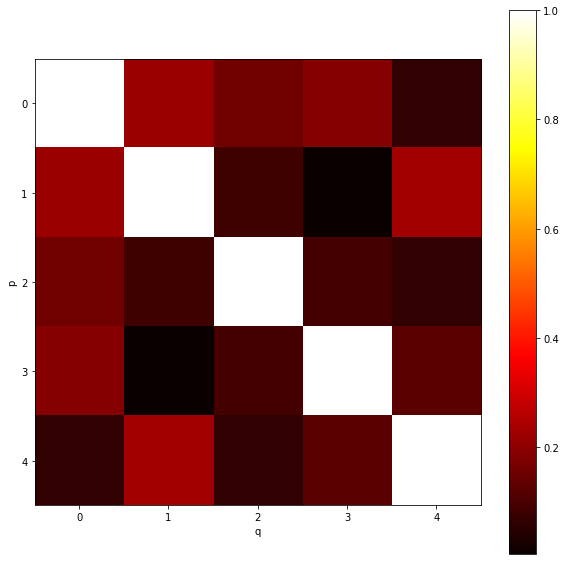

Text(0, 0.5, 'p')

In [0]:
s = matrix_s[0][0].toArray()
plt.figure(figsize=(10, 10))
plt.imshow(s, cmap="hot", interpolation="nearest")
plt.colorbar()
plt.xticks(ticks=range(5), labels=range(5))
plt.xlabel("q")
plt.yticks(ticks=range(5), labels=range(5))
plt.ylabel("p")

In [0]:
#only cluster on scores
scores_df = df5[score_feats]

In [0]:
scores_df.show()
scores_df.count()

+---------+---------+---------+---------+---------+
Ext_score|Est_score|Opn_score|Agr_score|Csn_score|
+---------+---------+---------+---------+---------+
 36.0| 26.0| 35.0| 25.0| 22.0|
 10.0| 25.0| 25.0| 32.0| 27.0|
 15.0| 24.0| 31.0| 26.0| 24.0|
 16.0| 21.0| 29.0| 24.0| 15.0|
 19.0| 31.0| 38.0| 28.0| 38.0|
 22.0| 28.0| 34.0| 26.0| 27.0|
 25.0| 20.0| 33.0| 29.0| 23.0|
 32.0| 34.0| 33.0| 24.0| 35.0|
 12.0| 19.0| 25.0| 13.0| 7.0|
 19.0| 11.0| 40.0| 23.0| 14.0|
 30.0| 4.0| 33.0| 25.0| 26.0|
 34.0| 26.0| 39.0| 30.0| 12.0|
 6.0| 10.0| 30.0| 30.0| 23.0|
 21.0| 13.0| 32.0| 24.0| 25.0|
 10.0| 13.0| 28.0| 22.0| 18.0|
 31.0| 30.0| 18.0| 27.0| 19.0|
 34.0| 8.0| 20.0| 21.0| 35.0|
 15.0| 8.0| 24.0| 25.0| 27.0|
 19.0| 16.0| 13.0| 24.0| 19.0|
 9.0| 26.0| 21.0| 27.0| 28.0|
+---------+---------+---------+---------+---------+
only showing top 20 rows

Out[138]: 873173

In [0]:
### verify the scope of the scores (all of them should be no larger than 40 if the calculation is correct) ###
expr_s = ' and '.join('(%s <= 40.0)' % col for col in score_feats )
scores_df_f = scores_df.filter(expr_s)
scores_df_f.count()

Out[139]: 873173

Start K-means Clutering

In [0]:
# updated_feats = [feat+"_ohe" for feat in categorical_feats]
# updated_feats += numeric_feats

assembler = VectorAssembler(inputCols=score_feats, outputCol='features')
td_assem = assembler.transform(scores_df)
td_assem.show()

+---------+---------+---------+---------+---------+--------------------+
Ext_score|Est_score|Opn_score|Agr_score|Csn_score| features|
+---------+---------+---------+---------+---------+--------------------+
 36.0| 26.0| 35.0| 25.0| 22.0|[36.0,26.0,35.0,2...|
 10.0| 25.0| 25.0| 32.0| 27.0|[10.0,25.0,25.0,3...|
 15.0| 24.0| 31.0| 26.0| 24.0|[15.0,24.0,31.0,2...|
 16.0| 21.0| 29.0| 24.0| 15.0|[16.0,21.0,29.0,2...|
 19.0| 31.0| 38.0| 28.0| 38.0|[19.0,31.0,38.0,2...|
 22.0| 28.0| 34.0| 26.0| 27.0|[22.0,28.0,34.0,2...|
 25.0| 20.0| 33.0| 29.0| 23.0|[25.0,20.0,33.0,2...|
 32.0| 34.0| 33.0| 24.0| 35.0|[32.0,34.0,33.0,2...|
 12.0| 19.0| 25.0| 13.0| 7.0|[12.0,19.0,25.0,1...|
 19.0| 11.0| 40.0| 23.0| 14.0|[19.0,11.0,40.0,2...|
 30.0| 4.0| 33.0| 25.0| 26.0|[30.0,4.0,33.0,25...|
 34.0| 26.0| 39.0| 30.0| 12.0|[34.0,26.0,39.0,3...|
 6.0| 10.0| 30.0| 30.0| 23.0|[6.0,10.0,30.0,30...|
 21.0| 13.0| 32.0| 24.0| 25.0|[21.0,13.0,32.0,2...|
 10.0| 13.0| 28.0| 22.0| 18.0|[10.0,13.0,28.0,2...|
 31.0| 30.0| 18.0| 27.0| 19.0|[31.0,30.0,18.0,2...|
 34.0| 8.0| 20.0| 21.0| 35.0|[34.0,8.0,20.0,21...|
 15.0| 8.0| 24.0| 25.0| 27.0|[15.0,8.0,24.0,25...|
 19.0| 16.0| 13.0| 24.0| 19.0|[19.0,16.0,13.0,2...|
 9.0| 26.0| 21.0| 27.0| 28.0|[9.0,26.0,21.0,27...|
+---------+---------+---------+---------+---------+--------------------+
only showing top 20 rows

3 clusters

In [0]:
cluster_3 = td_assem

In [0]:
kmeans = KMeans(featuresCol = 'features').setK(3).setSeed(23)
model = kmeans.fit(cluster_3)

# Make predictions
predictions_3 = model.transform(cluster_3)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions_3)
print("Silhouette with squared euclidean distance = " + str(silhouette))

# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Silhouette with squared euclidean distance = 0.3054027864168939
Cluster Centers: 
[28.90600036 23.18993749 30.6469336 25.95269491 25.00200604]
[13.60853251 24.53831116 28.1428746 23.73193621 26.45792473]
[15.19225159 11.22009642 28.03170096 24.28166546 20.03026177]

In [0]:
predictions_3.show()

+---------+---------+---------+---------+---------+--------------------+----------+
Ext_score|Est_score|Opn_score|Agr_score|Csn_score| features|prediction|
+---------+---------+---------+---------+---------+--------------------+----------+
 36.0| 26.0| 35.0| 25.0| 22.0|[36.0,26.0,35.0,2...| 0|
 10.0| 25.0| 25.0| 32.0| 27.0|[10.0,25.0,25.0,3...| 1|
 15.0| 24.0| 31.0| 26.0| 24.0|[15.0,24.0,31.0,2...| 1|
 16.0| 21.0| 29.0| 24.0| 15.0|[16.0,21.0,29.0,2...| 2|
 19.0| 31.0| 38.0| 28.0| 38.0|[19.0,31.0,38.0,2...| 1|
 22.0| 28.0| 34.0| 26.0| 27.0|[22.0,28.0,34.0,2...| 0|
 25.0| 20.0| 33.0| 29.0| 23.0|[25.0,20.0,33.0,2...| 0|
 32.0| 34.0| 33.0| 24.0| 35.0|[32.0,34.0,33.0,2...| 0|
 12.0| 19.0| 25.0| 13.0| 7.0|[12.0,19.0,25.0,1...| 2|
 19.0| 11.0| 40.0| 23.0| 14.0|[19.0,11.0,40.0,2...| 2|
 30.0| 4.0| 33.0| 25.0| 26.0|[30.0,4.0,33.0,25...| 2|
 34.0| 26.0| 39.0| 30.0| 12.0|[34.0,26.0,39.0,3...| 0|
 6.0| 10.0| 30.0| 30.0| 23.0|[6.0,10.0,30.0,30...| 2|
 21.0| 13.0| 32.0| 24.0| 25.0|[21.0,13.0,32.0,2...| 2|
 10.0| 13.0| 28.0| 22.0| 18.0|[10.0,13.0,28.0,2...| 2|
 31.0| 30.0| 18.0| 27.0| 19.0|[31.0,30.0,18.0,2...| 0|
 34.0| 8.0| 20.0| 21.0| 35.0|[34.0,8.0,20.0,21...| 0|
 15.0| 8.0| 24.0| 25.0| 27.0|[15.0,8.0,24.0,25...| 2|
 19.0| 16.0| 13.0| 24.0| 19.0|[19.0,16.0,13.0,2...| 2|
 9.0| 26.0| 21.0| 27.0| 28.0|[9.0,26.0,21.0,27...| 1|
+---------+---------+---------+---------+---------+--------------------+----------+
only showing top 20 rows

In [0]:
cluster_4 = td_assem

In [0]:
kmeans = KMeans(featuresCol = 'features').setK(4).setSeed(7)
model = kmeans.fit(cluster_4)

# Make predictions
predictions_4 = model.transform(cluster_4)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions_4)
print("Silhouette with squared euclidean distance = " + str(silhouette))

# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Silhouette with squared euclidean distance = 0.28779562662444713
Cluster Centers: 
[14.06112729 24.56825648 28.01916499 23.73351058 26.0454888 ]
[28.74930916 27.84875858 31.1928697 26.14595545 27.63256259]
[25.97672012 14.48167573 29.51603672 25.35692634 20.69663087]
[10.74908774 11.23952989 27.54746976 23.83637265 20.69325486]

In [0]:
#clustering 5

In [0]:
cluster_5 = td_assem

In [0]:
kmeans = KMeans(featuresCol = 'features').setK(5).setSeed(3)
model = kmeans.fit(cluster_5)

# Make predictions
predictions_5 = model.transform(cluster_5)

# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions_5)
print("Silhouette with squared euclidean distance = " + str(silhouette))

# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Silhouette with squared euclidean distance = 0.2591491162749946
Cluster Centers: 
[13.5924739 24.66338612 26.34433807 22.6726244 21.27413167]
[29.6765431 19.35105355 30.18195677 25.75720481 22.36607197]
[24.34661424 28.74441201 31.18561299 26.06354934 30.782966 ]
[11.1695742 12.92295125 28.41756529 24.6066398 27.54421918]
[17.80959313 10.51446343 28.74914291 24.36774307 16.1957763 ]

In [0]:
predictions_5.show()

+---------+---------+---------+---------+---------+--------------------+----------+
Ext_score|Est_score|Opn_score|Agr_score|Csn_score| features|prediction|
+---------+---------+---------+---------+---------+--------------------+----------+
 36.0| 26.0| 35.0| 25.0| 22.0|[36.0,26.0,35.0,2...| 1|
 10.0| 25.0| 25.0| 32.0| 27.0|[10.0,25.0,25.0,3...| 0|
 15.0| 24.0| 31.0| 26.0| 24.0|[15.0,24.0,31.0,2...| 0|
 16.0| 21.0| 29.0| 24.0| 15.0|[16.0,21.0,29.0,2...| 0|
 19.0| 31.0| 38.0| 28.0| 38.0|[19.0,31.0,38.0,2...| 2|
 22.0| 28.0| 34.0| 26.0| 27.0|[22.0,28.0,34.0,2...| 2|
 25.0| 20.0| 33.0| 29.0| 23.0|[25.0,20.0,33.0,2...| 1|
 32.0| 34.0| 33.0| 24.0| 35.0|[32.0,34.0,33.0,2...| 2|
 12.0| 19.0| 25.0| 13.0| 7.0|[12.0,19.0,25.0,1...| 4|
 19.0| 11.0| 40.0| 23.0| 14.0|[19.0,11.0,40.0,2...| 4|
 30.0| 4.0| 33.0| 25.0| 26.0|[30.0,4.0,33.0,25...| 1|
 34.0| 26.0| 39.0| 30.0| 12.0|[34.0,26.0,39.0,3...| 1|
 6.0| 10.0| 30.0| 30.0| 23.0|[6.0,10.0,30.0,30...| 3|
 21.0| 13.0| 32.0| 24.0| 25.0|[21.0,13.0,32.0,2...| 4|
 10.0| 13.0| 28.0| 22.0| 18.0|[10.0,13.0,28.0,2...| 4|
 31.0| 30.0| 18.0| 27.0| 19.0|[31.0,30.0,18.0,2...| 1|
 34.0| 8.0| 20.0| 21.0| 35.0|[34.0,8.0,20.0,21...| 1|
 15.0| 8.0| 24.0| 25.0| 27.0|[15.0,8.0,24.0,25...| 3|
 19.0| 16.0| 13.0| 24.0| 19.0|[19.0,16.0,13.0,2...| 4|
 9.0| 26.0| 21.0| 27.0| 28.0|[9.0,26.0,21.0,27...| 0|
+---------+---------+---------+---------+---------+--------------------+----------+
only showing top 20 rows

Reduce the demisions so that to plot images

In [0]:
predictions_3_reduce = predictions_3
predictions_5_reduce = predictions_5

In [0]:
predictions_4_reduce = predictions_4

In [0]:
pca_1 = PCA(k=3, inputCol="features", outputCol="pcaFeatures")
model_1 = pca_1.fit(predictions_3_reduce)

result_3 = model_1.transform(predictions_3_reduce).select("pcaFeatures","prediction")

result_3.show(truncate=False)

+------------------------------------------------------------+----------+
pcaFeatures |prediction|
+------------------------------------------------------------+----------+
[-56.05405100850594,2.133401556608833,17.661169999402944] |0 |
[-37.0529392218641,-16.54803711091464,20.286928831544056] |1 |
[-39.63817638636702,-11.360947234902165,18.51329074798862] |1 |
[-35.57612653832976,-5.042365530198545,12.089013918019333] |2 |
[-51.918164654399924,-18.794362045644124,28.091370064565623]|1 |
[-48.429480604904995,-10.405853348196992,19.827344313736774]|0 |
[-44.813844422571854,-1.674325346698371,21.35152429471991] |0 |
[-61.08750579682484,-11.511460871452282,23.2568063341105] |0 |
[-27.530576367692195,-3.8907211579150616,3.4901770194324593]|2 |
[-33.14633736305239,4.068570570331407,18.34203673044331] |2 |
[-39.15445447607034,9.347489385836703,31.589324781147035] |2 |
[-53.07152522716978,6.22615821992026,11.120922446357344] |0 |
[-24.628029728077465,-8.10664033224403,25.027480204973404] |2 |
[-37.55455856514453,-1.4994225606813707,25.17406685297557] |2 |
[-26.84021515057328,-5.783635901314633,17.71801656479783] |2 |
[-51.431206992466095,-3.2012837473483717,10.319484556647982]|0 |
[-44.34209872070797,4.0236894446682285,34.0239138462429] |0 |
[-29.506759500784522,-3.8497312324076916,27.836100314595704]|2 |
[-33.14977899282603,-3.220064988663827,15.361238928619425] |2 |
[-36.03563830683937,-18.96572233933949,18.82363495429863] |1 |
+------------------------------------------------------------+----------+
only showing top 20 rows

In [0]:
slicer_1 = VectorSlicer(inputCol="pcaFeatures", outputCol="pca_1", indices=[0])
output1 = slicer_1.transform(result_3)
slicer_2 = VectorSlicer(inputCol="pcaFeatures", outputCol="pca_2", indices=[1])
output2 = slicer_2.transform(output1)
slicer_3 = VectorSlicer(inputCol="pcaFeatures", outputCol="pca_3", indices=[2])
re_cluster_3 = slicer_3.transform(output2)
red_cluster_3 = re_cluster_3.drop("pcaFeatures")
red_cluster_3.show()

+----------+--------------------+--------------------+--------------------+
prediction| pca_1| pca_2| pca_3|
+----------+--------------------+--------------------+--------------------+
 0|[-56.05405100850594]| [2.133401556608833]|[17.661169999402944]|
 1| [-37.0529392218641]|[-16.54803711091464]|[20.286928831544056]|
 1|[-39.63817638636702]|[-11.360947234902...| [18.51329074798862]|
 2|[-35.57612653832976]|[-5.042365530198545]|[12.089013918019333]|
 1|[-51.918164654399...|[-18.794362045644...|[28.091370064565623]|
 0|[-48.429480604904...|[-10.405853348196...|[19.827344313736774]|
 0|[-44.813844422571...|[-1.674325346698371]| [21.35152429471991]|
 0|[-61.08750579682484]|[-11.511460871452...| [23.2568063341105]|
 2|[-27.530576367692...|[-3.8907211579150...|[3.4901770194324593]|
 2|[-33.14633736305239]| [4.068570570331407]| [18.34203673044331]|
 2|[-39.15445447607034]| [9.347489385836703]|[31.589324781147035]|
 0|[-53.07152522716978]| [6.22615821992026]|[11.120922446357344]|
 2|[-24.628029728077...| [-8.10664033224403]|[25.027480204973404]|
 2|[-37.55455856514453]|[-1.4994225606813...| [25.17406685297557]|
 2|[-26.84021515057328]|[-5.783635901314633]| [17.71801656479783]|
 0|[-51.431206992466...|[-3.2012837473483...|[10.319484556647982]|
 0|[-44.34209872070797]|[4.0236894446682285]| [34.0239138462429]|
 2|[-29.506759500784...|[-3.8497312324076...|[27.836100314595704]|
 2|[-33.14977899282603]|[-3.220064988663827]|[15.361238928619425]|
 1|[-36.03563830683937]|[-18.96572233933949]| [18.82363495429863]|
+----------+--------------------+--------------------+--------------------+
only showing top 20 rows

In [0]:
clu_3 = red_cluster_3.select("prediction").collect()

In [0]:
clu_3 = np.array(clu_3)

In [0]:
x = np.array(red_cluster_3.select("pca_1").collect())
y = np.array(red_cluster_3.select("pca_2").collect())
z = np.array(red_cluster_3.select("pca_3").collect())

In [0]:
x3 = x.reshape(-1,1)
y3 = y.reshape(-1,1)
z3 = z.reshape(-1,1)

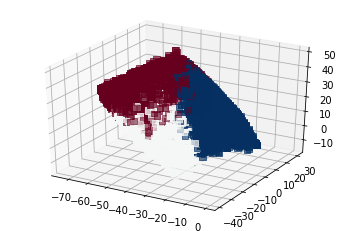

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(x3,y3,z3, marker="s", c=clu_3, s=40, cmap="RdBu")

plt.show()

clustering 4

In [0]:
pca_3 = PCA(k=3, inputCol="features", outputCol="pcaFeatures")
model_3 = pca_3.fit(predictions_4_reduce)

result_4 = model_3.transform(predictions_4_reduce).select("pcaFeatures","prediction")

result_4.show(truncate=False)

+------------------------------------------------------------+----------+
pcaFeatures |prediction|
+------------------------------------------------------------+----------+
[-56.05405100850594,2.133401556608833,17.661169999402944] |1 |
[-37.0529392218641,-16.54803711091464,20.286928831544056] |0 |
[-39.63817638636702,-11.360947234902165,18.51329074798862] |0 |
[-35.57612653832976,-5.042365530198545,12.089013918019333] |0 |
[-51.918164654399924,-18.794362045644124,28.091370064565623]|1 |
[-48.429480604904995,-10.405853348196992,19.827344313736774]|1 |
[-44.813844422571854,-1.674325346698371,21.35152429471991] |2 |
[-61.08750579682484,-11.511460871452282,23.2568063341105] |1 |
[-27.530576367692195,-3.8907211579150616,3.4901770194324593]|3 |
[-33.14633736305239,4.068570570331407,18.34203673044331] |2 |
[-39.15445447607034,9.347489385836703,31.589324781147035] |2 |
[-53.07152522716978,6.22615821992026,11.120922446357344] |1 |
[-24.628029728077465,-8.10664033224403,25.027480204973404] |3 |
[-37.55455856514453,-1.4994225606813707,25.17406685297557] |2 |
[-26.84021515057328,-5.783635901314633,17.71801656479783] |3 |
[-51.431206992466095,-3.2012837473483717,10.319484556647982]|1 |
[-44.34209872070797,4.0236894446682285,34.0239138462429] |2 |
[-29.506759500784522,-3.8497312324076916,27.836100314595704]|3 |
[-33.14977899282603,-3.220064988663827,15.361238928619425] |3 |
[-36.03563830683937,-18.96572233933949,18.82363495429863] |0 |
+------------------------------------------------------------+----------+
only showing top 20 rows

In [0]:
slicer_111 = VectorSlicer(inputCol="pcaFeatures", outputCol="pca_1", indices=[0])
output111 = slicer_111.transform(result_4)
slicer_222 = VectorSlicer(inputCol="pcaFeatures", outputCol="pca_2", indices=[1])
output222 = slicer_222.transform(output111)
slicer_333 = VectorSlicer(inputCol="pcaFeatures", outputCol="pca_3", indices=[2])
re_cluster_4 = slicer_333.transform(output222)
red_cluster_4 = re_cluster_4.drop("pcaFeatures")
red_cluster_4.show()

+----------+--------------------+--------------------+--------------------+
prediction| pca_1| pca_2| pca_3|
+----------+--------------------+--------------------+--------------------+
 1|[-56.05405100850594]| [2.133401556608833]|[17.661169999402944]|
 0| [-37.0529392218641]|[-16.54803711091464]|[20.286928831544056]|
 0|[-39.63817638636702]|[-11.360947234902...| [18.51329074798862]|
 0|[-35.57612653832976]|[-5.042365530198545]|[12.089013918019333]|
 1|[-51.918164654399...|[-18.794362045644...|[28.091370064565623]|
 1|[-48.429480604904...|[-10.405853348196...|[19.827344313736774]|
 2|[-44.813844422571...|[-1.674325346698371]| [21.35152429471991]|
 1|[-61.08750579682484]|[-11.511460871452...| [23.2568063341105]|
 3|[-27.530576367692...|[-3.8907211579150...|[3.4901770194324593]|
 2|[-33.14633736305239]| [4.068570570331407]| [18.34203673044331]|
 2|[-39.15445447607034]| [9.347489385836703]|[31.589324781147035]|
 1|[-53.07152522716978]| [6.22615821992026]|[11.120922446357344]|
 3|[-24.628029728077...| [-8.10664033224403]|[25.027480204973404]|
 2|[-37.55455856514453]|[-1.4994225606813...| [25.17406685297557]|
 3|[-26.84021515057328]|[-5.783635901314633]| [17.71801656479783]|
 1|[-51.431206992466...|[-3.2012837473483...|[10.319484556647982]|
 2|[-44.34209872070797]|[4.0236894446682285]| [34.0239138462429]|
 3|[-29.506759500784...|[-3.8497312324076...|[27.836100314595704]|
 3|[-33.14977899282603]|[-3.220064988663827]|[15.361238928619425]|
 0|[-36.03563830683937]|[-18.96572233933949]| [18.82363495429863]|
+----------+--------------------+--------------------+--------------------+
only showing top 20 rows

In [0]:
clu_4 = np.array(red_cluster_4.select("prediction").collect())
x4 = np.array(red_cluster_3.select("pca_1").collect())
y4 = np.array(red_cluster_3.select("pca_2").collect())
z4 = np.array(red_cluster_3.select("pca_3").collect())

In [0]:
x4 = x4.reshape(-1,1)
y4 = y4.reshape(-1,1)
z4 = z4.reshape(-1,1)

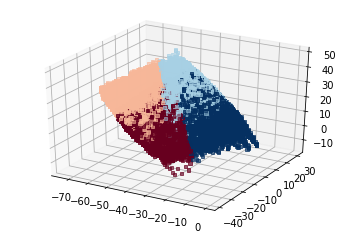

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x4,y4,z4, marker="s", c=clu_4, s=10, cmap="RdBu")
plt.show()

In [0]:
pca_2 = PCA(k=3, inputCol="features", outputCol="pcaFeatures")
model_2 = pca_2.fit(predictions_5_reduce)

result_5 = model_2.transform(predictions_5_reduce).select("pcaFeatures","prediction")

result_5.show(truncate=False)

+------------------------------------------------------------+----------+
pcaFeatures |prediction|
+------------------------------------------------------------+----------+
[-56.05405100850594,2.133401556608833,17.661169999402944] |1 |
[-37.0529392218641,-16.54803711091464,20.286928831544056] |0 |
[-39.63817638636702,-11.360947234902165,18.51329074798862] |0 |
[-35.57612653832976,-5.042365530198545,12.089013918019333] |0 |
[-51.918164654399924,-18.794362045644124,28.091370064565623]|2 |
[-48.429480604904995,-10.405853348196992,19.827344313736774]|2 |
[-44.813844422571854,-1.674325346698371,21.35152429471991] |1 |
[-61.08750579682484,-11.511460871452282,23.2568063341105] |2 |
[-27.530576367692195,-3.8907211579150616,3.4901770194324593]|4 |
[-33.14633736305239,4.068570570331407,18.34203673044331] |4 |
[-39.15445447607034,9.347489385836703,31.589324781147035] |1 |
[-53.07152522716978,6.22615821992026,11.120922446357344] |1 |
[-24.628029728077465,-8.10664033224403,25.027480204973404] |3 |
[-37.55455856514453,-1.4994225606813707,25.17406685297557] |4 |
[-26.84021515057328,-5.783635901314633,17.71801656479783] |4 |
[-51.431206992466095,-3.2012837473483717,10.319484556647982]|1 |
[-44.34209872070797,4.0236894446682285,34.0239138462429] |1 |
[-29.506759500784522,-3.8497312324076916,27.836100314595704]|3 |
[-33.14977899282603,-3.220064988663827,15.361238928619425] |4 |
[-36.03563830683937,-18.96572233933949,18.82363495429863] |0 |
+------------------------------------------------------------+----------+
only showing top 20 rows

In [0]:
slicer_11 = VectorSlicer(inputCol="pcaFeatures", outputCol="pca_1", indices=[0])
output11 = slicer_11.transform(result_5)
slicer_22 = VectorSlicer(inputCol="pcaFeatures", outputCol="pca_2", indices=[1])
output22 = slicer_22.transform(output11)
slicer_33 = VectorSlicer(inputCol="pcaFeatures", outputCol="pca_3", indices=[2])
re_cluster_5 = slicer_33.transform(output22)
red_cluster_5 = re_cluster_5.drop("pcaFeatures")
red_cluster_5.show()

+--------------------+
 pca_1|
+--------------------+
[-56.05405100850594]|
 [-37.0529392218641]|
[-39.63817638636702]|
[-35.57612653832976]|
[-51.918164654399...|
[-48.429480604904...|
[-44.813844422571...|
[-61.08750579682484]|
[-27.530576367692...|
[-33.14633736305239]|
[-39.15445447607034]|
[-53.07152522716978]|
[-24.628029728077...|
[-37.55455856514453]|
[-26.84021515057328]|
[-51.431206992466...|
[-44.34209872070797]|
[-29.506759500784...|
[-33.14977899282603]|
[-36.03563830683937]|
+--------------------+
only showing top 20 rows

In [0]:
clu = red_cluster_5.select("prediction").collect()

In [0]:
x = np.array(red_cluster_5.select("pca_1").collect())
y = np.array(red_cluster_5.select("pca_2").collect())
z = np.array(red_cluster_5.select("pca_3").collect())

In [0]:
x1 = x.reshape(-1,1)
y1 = y.reshape(-1,1)
z1 = z.reshape(-1,1)

In [0]:
clu_1 = np.array(clu)

In [0]:
print(x1.shape,y1.shape,z1.shape,clu_1.shape)

(873173, 1) (873173, 1) (873173, 1) (873173, 1)

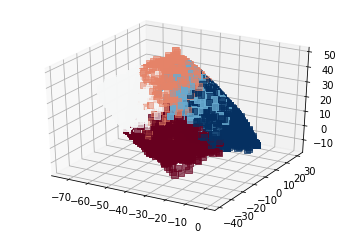

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
now = red_cluster_5.toPandas()

ax.scatter(x1,y1,z1, marker="s", c=clu_1, s=40, cmap="RdBu")

plt.show()